# OpenCV as an alternative to CNN

## Import libraries

In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Library versions

These are the versions that will run the code with no problem.

In [2]:
!python --version

Python 3.7.6


In [3]:
cv2.__version__

'4.2.0'

In [4]:
np.__version__

'1.18.4'

In [5]:
pd.__version__

'1.0.1'

In [6]:
import matplotlib
matplotlib.__version__

'3.1.3'

## 1) Setup auxiliary function

We will be printing images a lot, so it makes sense to build a function that will help us out.

In [24]:
def plotImage(imgs, titles):
    '''
    Simple function to plot an array of images with a title.
    INPUT: Array of Images and Array of Titles
    
    OUTPUT: Nothing
    '''
    
    for i, img in enumerate(imgs):
        plt.figure(figsize=(10,10)) #instantiate plot
        
        plt.imshow(img, cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    
        plt.show()
    return

In [25]:
img = cv2.imread('data/Mega Man.jpg') #Importing image as an object
img.shape #check image array dimension 

(500, 500, 3)

In [26]:
img = cv2.imread('data/Mega Man.jpg',0) #Importing once again, but without RGB dimentionality.
img.shape #check image array. First 100

(500, 500)

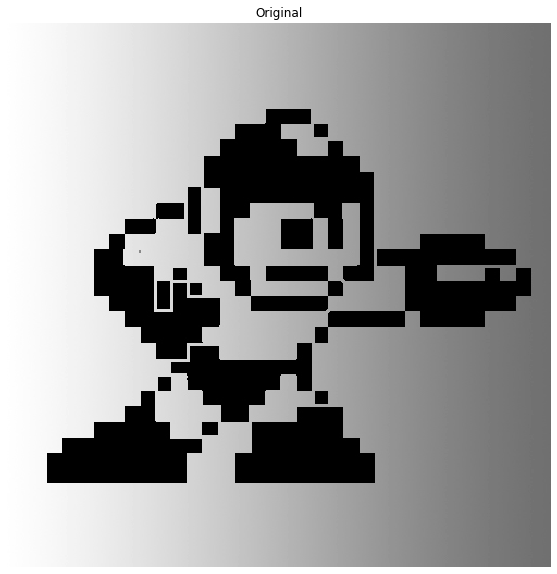

In [27]:
imgs = [img]
titles = ['Original']

# Plot image
plotImage(imgs,titles)

## 2) Filters

### 2.1) Erosion


### Morphological transformations are simple operations based on the image shape. Erosion works like in real life. It expands the pixels to the areas surrounding it, according to the kernel format

In [32]:
kernel = np.ones((5,5),np.uint8) # Matrix that will pass through the image. In this case it is a "square"

In [33]:
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [34]:
erosion = cv2.erode(img,kernel,iterations = 1)

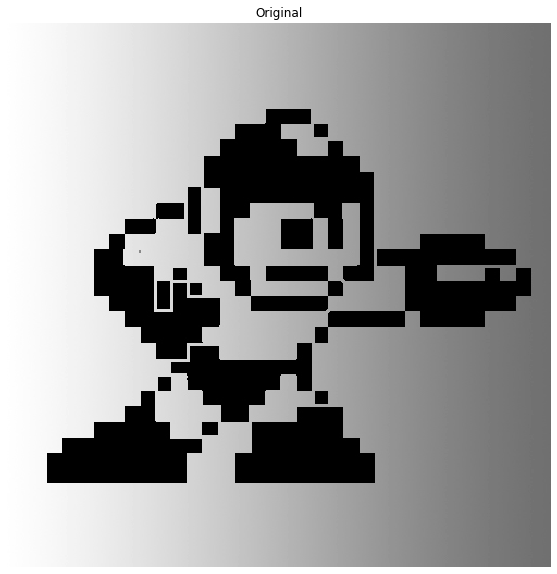

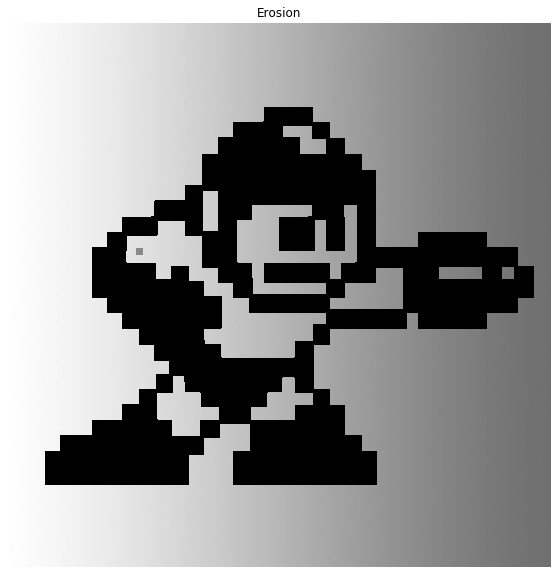

In [35]:
imgs = [img, erosion]
titles = ['Original', 'Erosion']

plotImage(imgs,titles)

### Let's crop the image to take a look at that anomaly on his shoulder

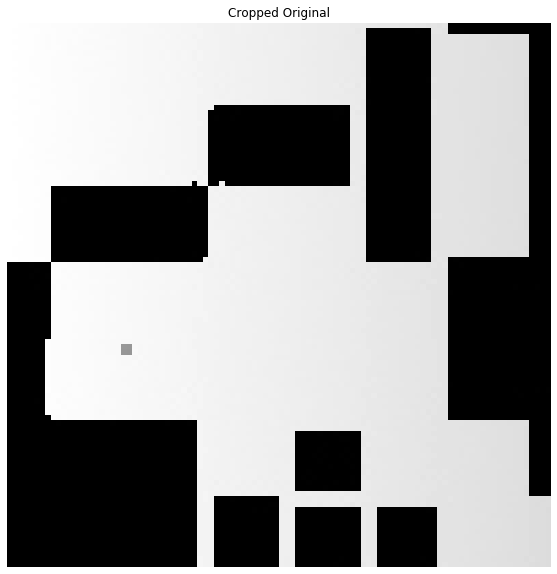

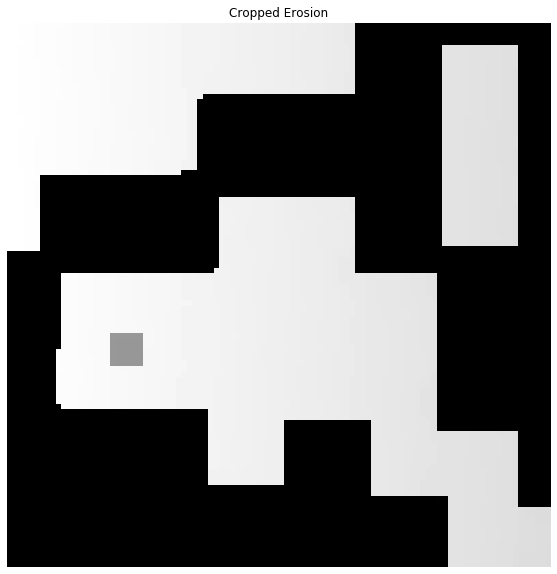

In [36]:
crop_img = img[150:250,100:200]
crop_erode = erosion[150:250,100:200]

imgs = [crop_img, crop_erode]
titles = ['Cropped Original', 'Cropped Erosion']

plotImage(imgs, titles)

### Let's try different Kernel shapes, first a diagonal line and then a ellipse/circle one 

In [38]:
kernel = np.array(np.identity(5), dtype='uint8')

In [39]:
kernel

array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1]], dtype=uint8)

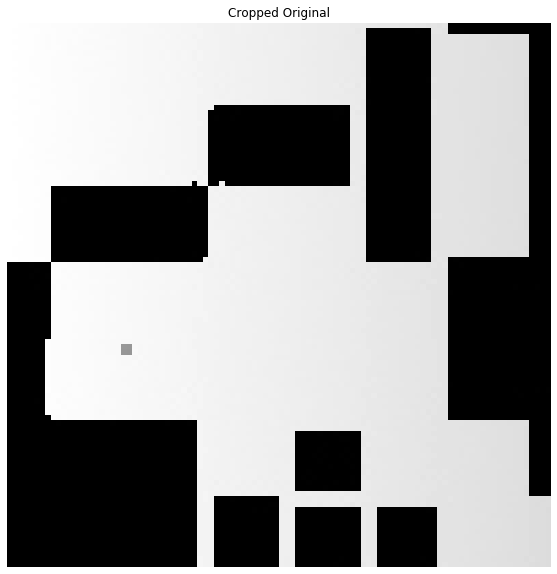

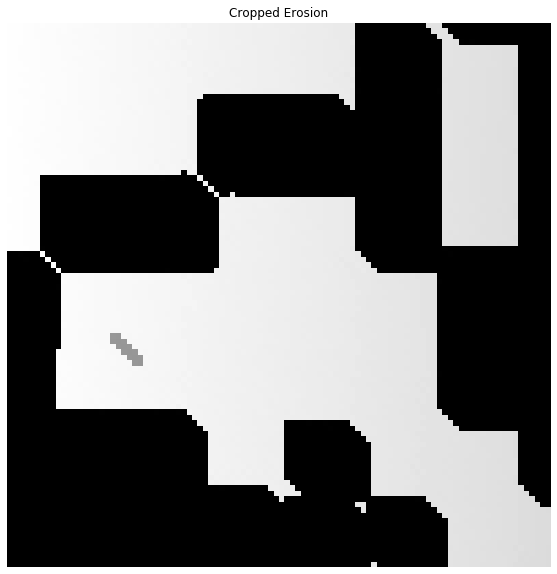

In [40]:
erosion = cv2.erode(img,kernel,iterations = 1)

crop_img = img[150:250,100:200]
crop_erode = erosion[150:250,100:200]

imgs = [crop_img, crop_erode]
titles = ['Cropped Original', 'Cropped Erosion']

plotImage(imgs, titles)

In [41]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(10,5))

In [42]:
kernel

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]], dtype=uint8)

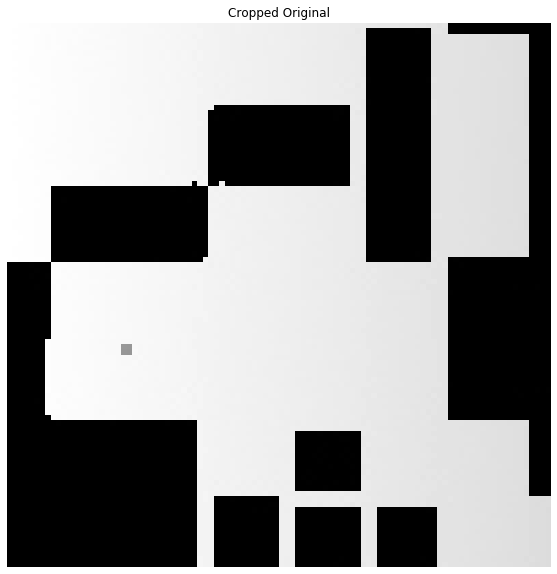

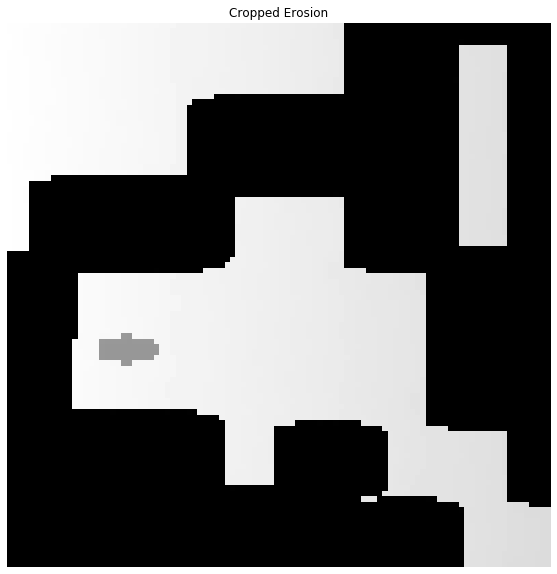

In [43]:
erosion = cv2.erode(img,kernel,iterations = 1)

crop_img = img[150:250,100:200]
crop_erode = erosion[150:250,100:200]

imgs = [crop_img, crop_erode]
titles = ['Cropped Original', 'Cropped Erosion']

plotImage(imgs, titles)

### 2.2) Dilation

### Basically the opposite of Erosion, which means it will retract the pixels according to the kernel

In [44]:
img = cv2.imread('data/Mega Man.jpg')

kernel = np.ones((5,5),np.uint8)
dilation = cv2.dilate(img,kernel,iterations = 1)

In [45]:
imgs = [img, dilation]
titles = ['Original', 'Dilation']

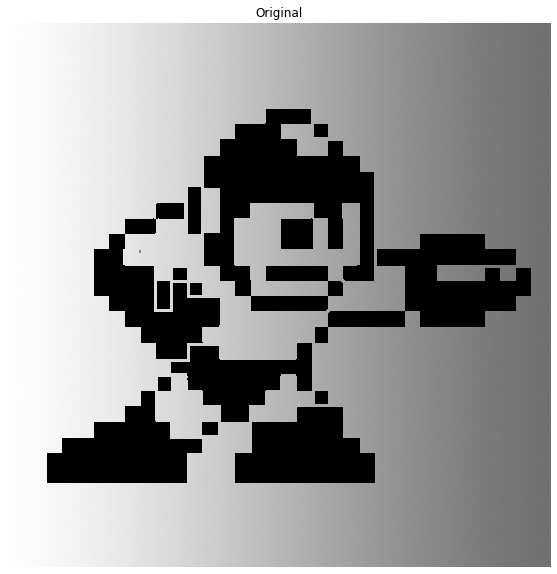

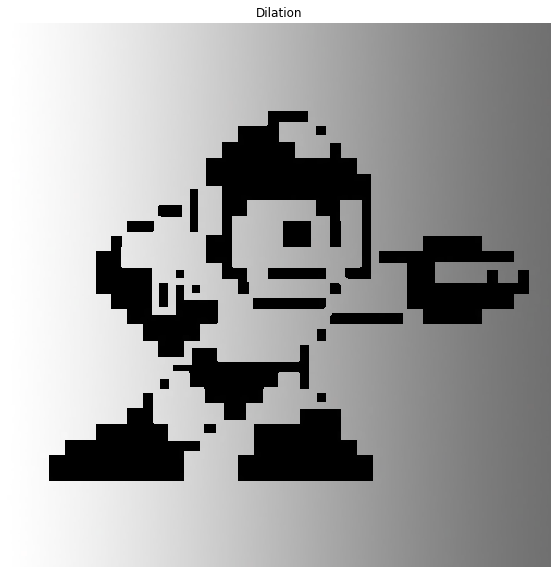

In [46]:
plotImage(imgs,titles)

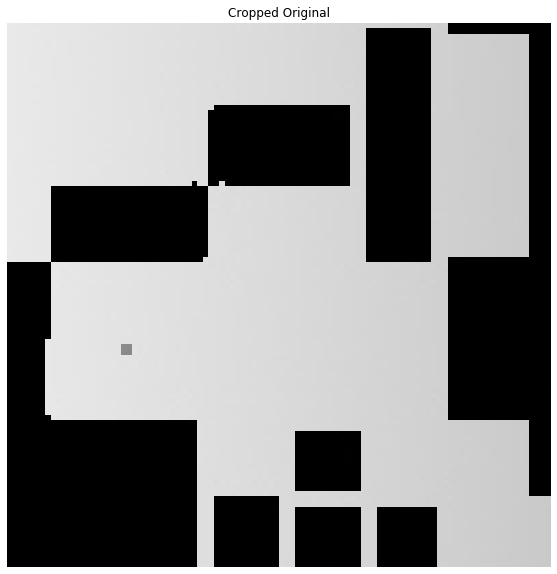

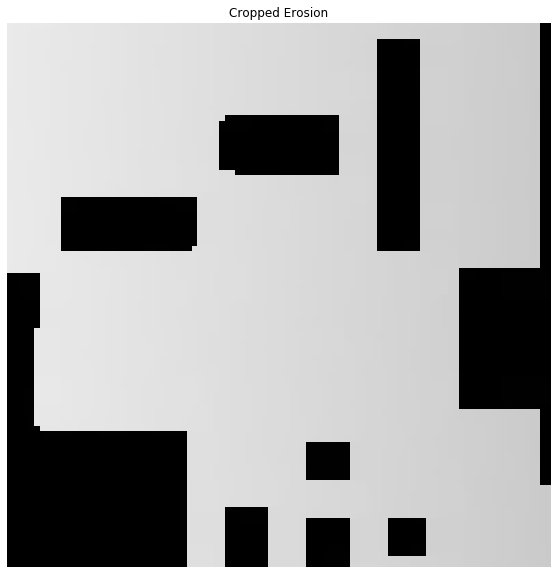

In [47]:
crop_img = img[150:250,100:200]
crop_dilate = dilation[150:250,100:200]

imgs = [crop_img, crop_dilate]
titles = ['Cropped Original', 'Cropped Erosion']

plotImage(imgs, titles)

In this case, it vanishes the anomally on his sholder. This is one of the techniques used for NOISE REDUCTION on photos, but there are more complex algorithm to do that

### <span style="color:red">Further reading:</span> There are two other basic transformations names Close and Open. Go check it out!!

### 2.3) Flip

In [48]:
img = cv2.imread('data/Mega Man.jpg')

flip_horizontal = cv2.flip(img,1)
flip_vertical = cv2.flip(img,0)
flip_both = cv2.flip(img,-1)

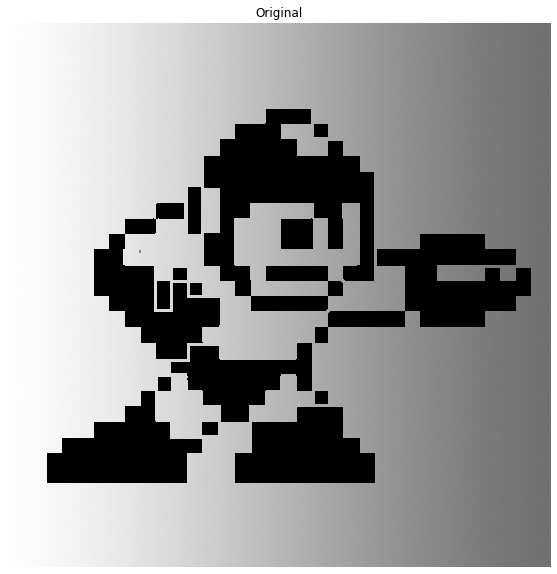

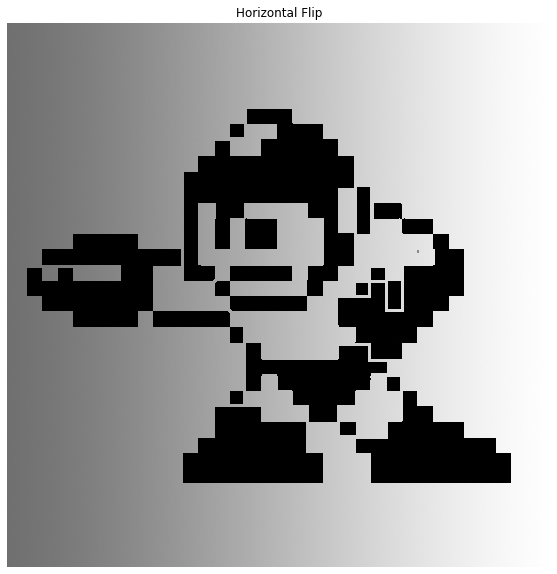

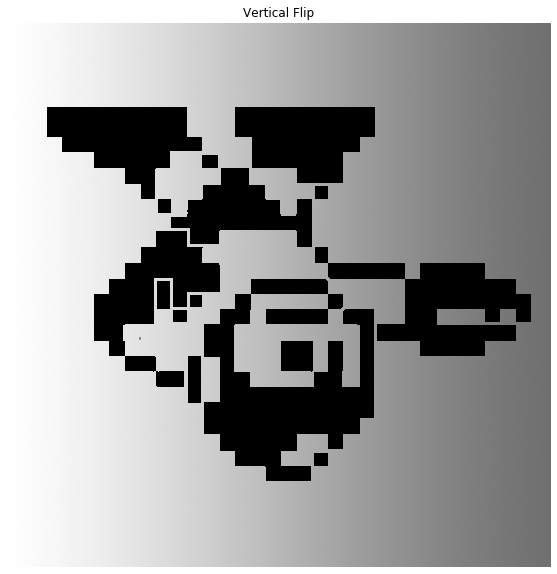

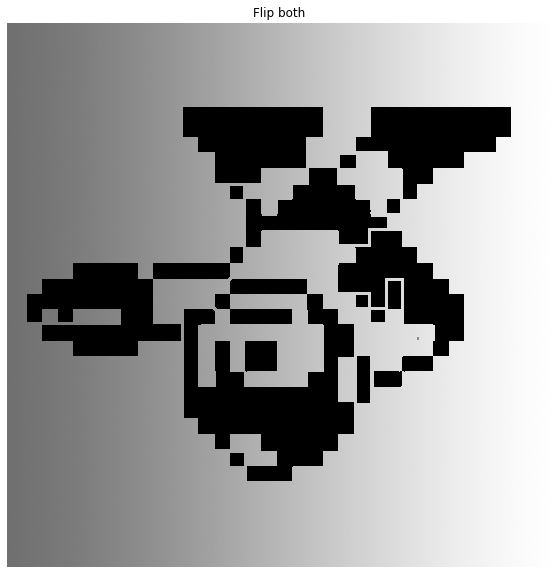

In [49]:
imgs = [img, flip_horizontal, flip_vertical, flip_both]
titles = ['Original', 'Horizontal Flip', 'Vertical Flip', 'Flip both']

plotImage(imgs,titles)

### 2.4) Morphology Ex

In [50]:
img = cv2.imread('data/Mega Man.jpg')

kernel = np.ones((5,5),np.uint8)
morphologyEx = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

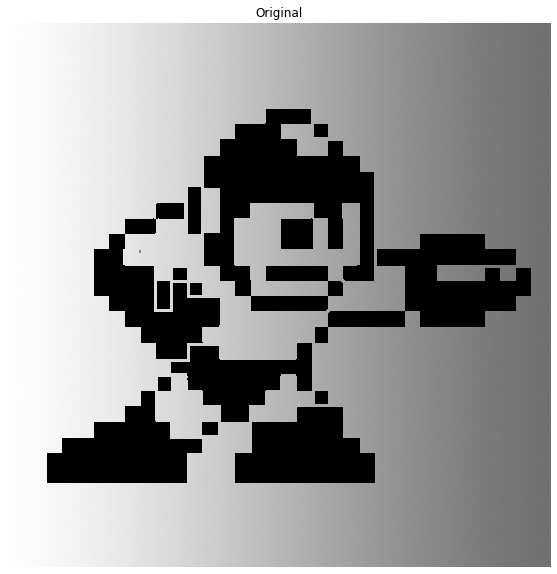

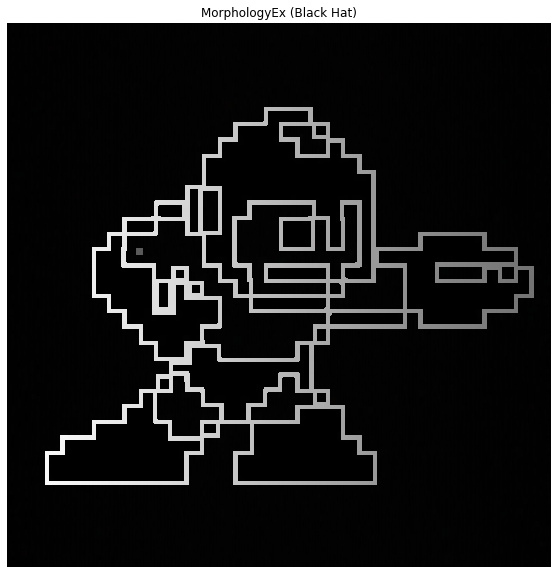

In [51]:
imgs = [img, morphologyEx]
titles = ['Original', 'MorphologyEx (Black Hat)']

plotImage(imgs,titles)

### 2.5) adaptiveThreshold

In [65]:
img = cv2.imread('data/Mega Man.jpg', 0) #image must be grayscale, in other words, 1 dimension
img_color = cv2.imread('data/Mega Man.jpg')

kernel = np.ones((5,5),np.uint8)

adaptiveTh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV,11,2)

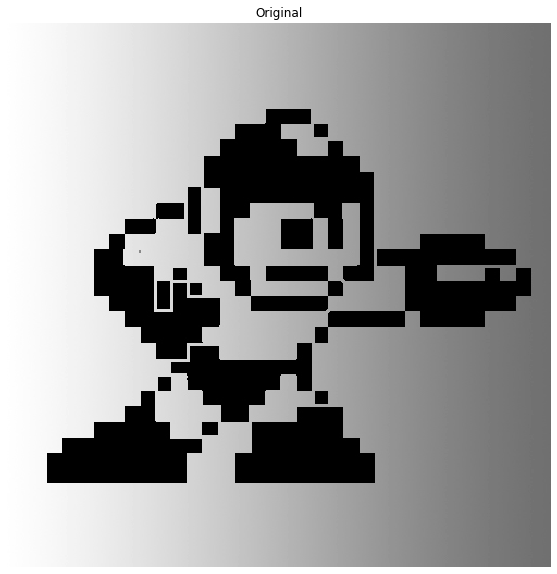

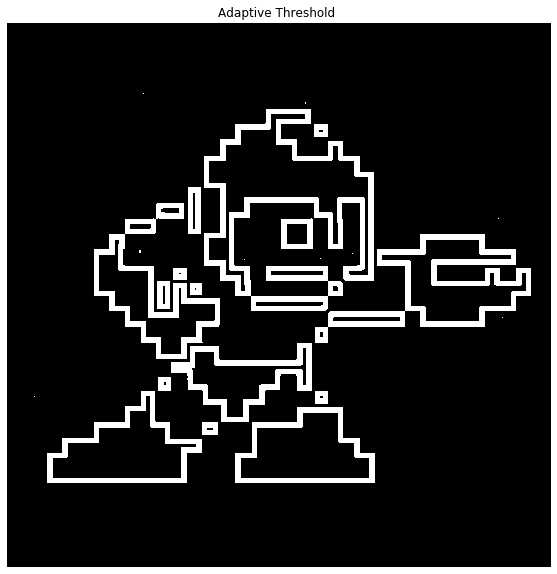

In [66]:
imgs = [img, adaptiveTh]
titles = ['Original', 'Adaptive Threshold ']

plotImage(imgs,titles)

### 2.6) findContours

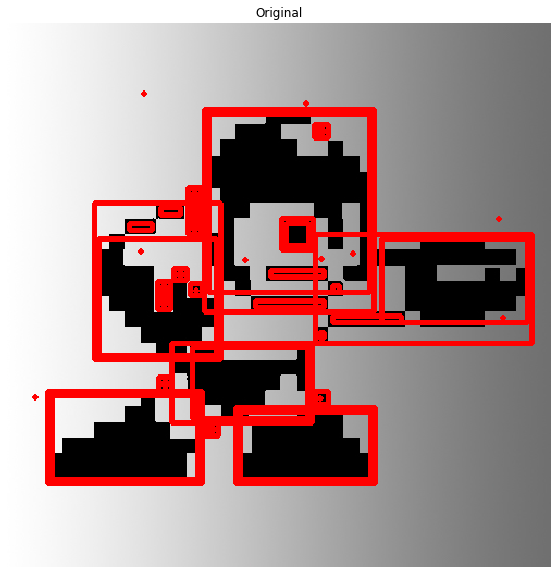

In [67]:
contours, _ = cv2.findContours(adaptiveTh, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_L1) #detecting contours. the second output on this function
                                                                                    #is hierarchy amoung countours, but we won't use them

rects = [cv2.boundingRect(cnt) for cnt in contours] #Contours are nested objects, so let's use list comprehantion (or regular for..loop) to get a list

# Formating rectangles
color = (255, 0, 0) # line color
thickness = 2 # line thickness
for i, rect in enumerate(rects): #for each element

        x,y,w,h = rect #getting values
        start_point = (x, y) 
        end_point = (x+w, y+h) 

        img = cv2.rectangle(img_color, start_point,end_point, color, thickness)  # adding rect to image
        
imgs = [img]
titles = ['Original']
plotImage(imgs,titles)

### But we only want to find specific Sizes and Shapes of anomallies. Here is one simple way to do that:

,x,y,w,h,area
4,25,343,1,1,1
6,287,344,1,1,1
13,455,270,1,1,1
15,173,245,1,1,1
20,218,217,1,1,1
21,288,216,1,1,1
22,317,211,1,1,1
23,122,209,1,1,1
28,451,179,1,1,1
38,286,97,4,4,16


(500, 500, 3)


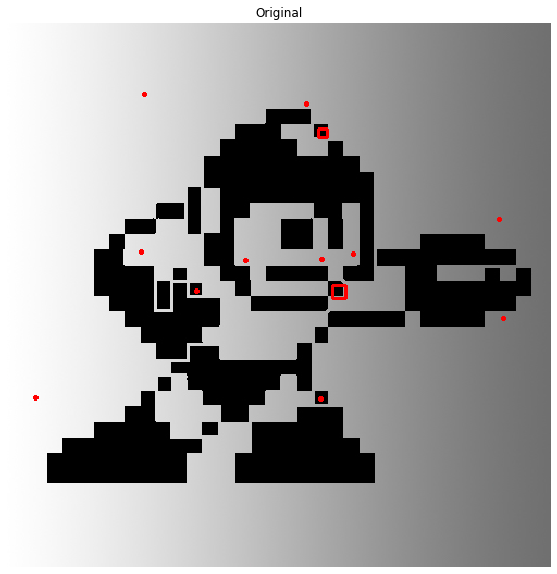

In [68]:
# Starting over
img = cv2.imread('data/Mega Man.jpg', 0) #image must be grayscale, in other words, 1 dimension
img_color = cv2.imread('data/Mega Man.jpg')


#Creating DataFrame from rects
df = pd.DataFrame(rects, columns=['x','y','w','h']) 
df['area'] = df['w']*df['h'] 

# Filtering DF
minsd = 0 #minimum size
maxsd = 0 #maximum size
mina = 0 #minimum area
maxa = 100 #maximum area

df = df[(abs((df['w'] - df['h'])) >= minsd ) 
     & (abs((df['w'] - df['h'])) <= maxsd )
     & (df['area'] > mina)
     & (df['area'] < maxa)].copy()   

display(df)

# Adding Squares only to the filtered artifacts
for i, rect in enumerate(df.values):
    color = (255, 0, 0) 
    thickness = 2

    x,y,w,h,area = rect

    start_point = (x, y) 
    end_point = (x+w*2, y+h*2) 

    img = cv2.rectangle(img_color, start_point,end_point, color, thickness) 

imgs = [img]
titles = ['Original']
plotImage(imgs,titles)

### That's better!!

## 3) Putting all together 

,x,y,w,h,area
416,119,207,7,7,49


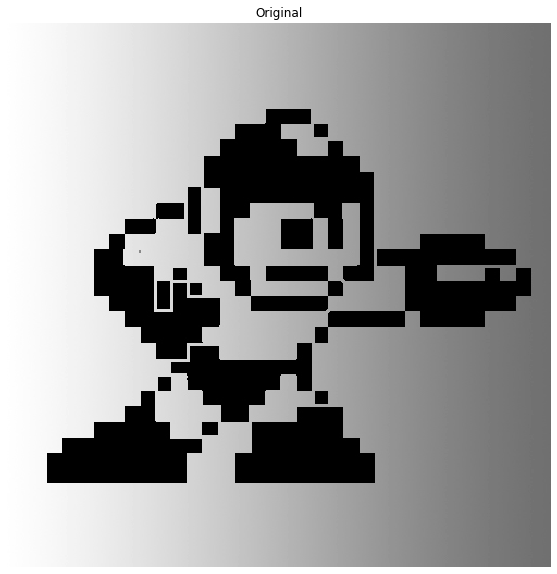

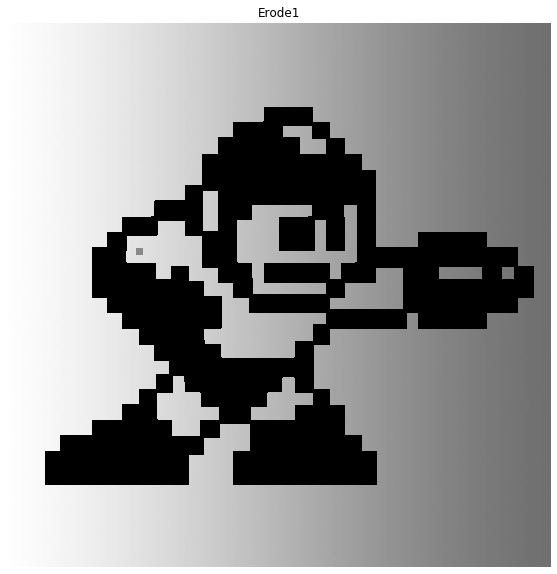

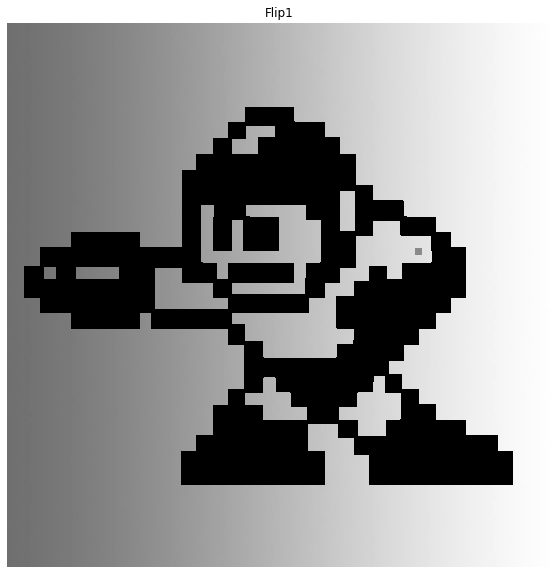

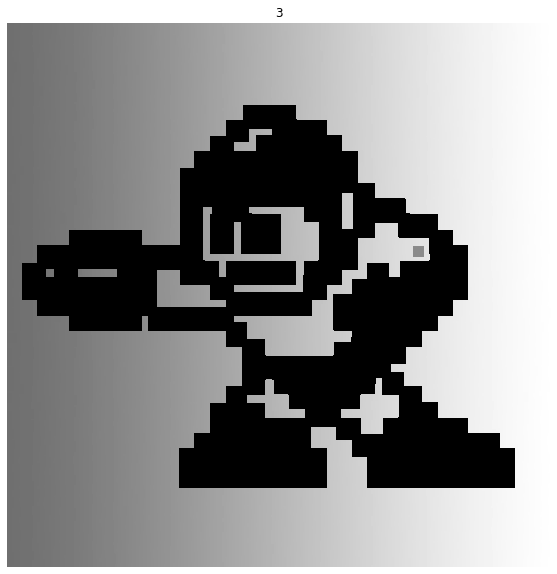

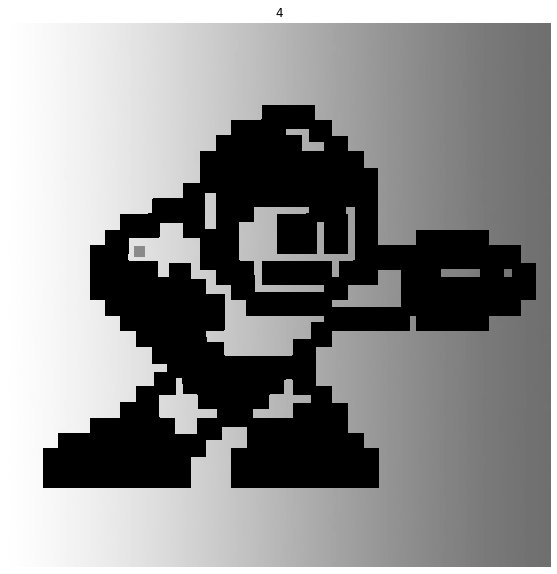

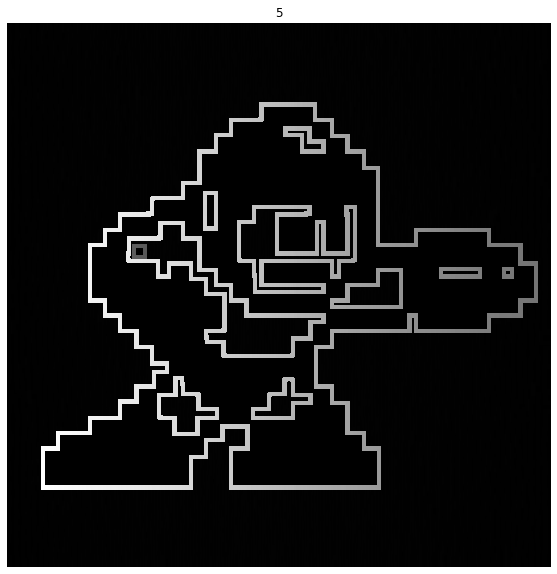

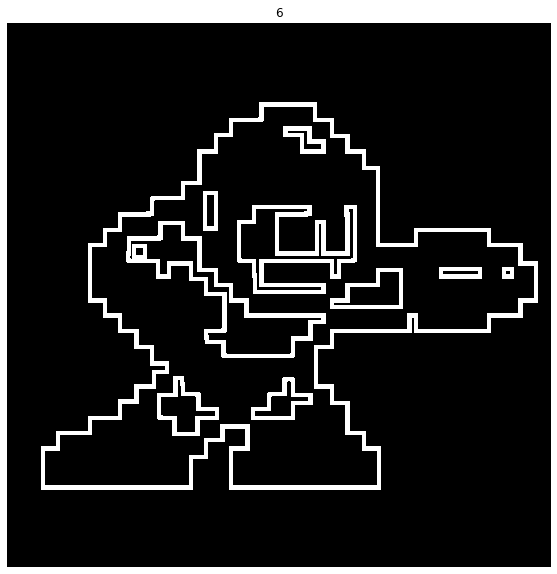

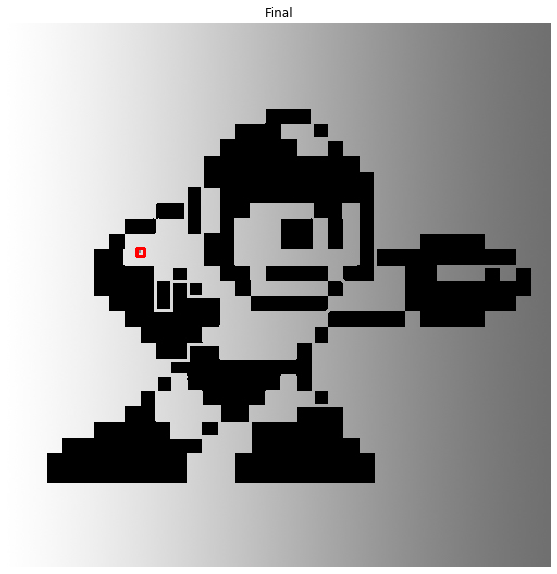

In [78]:
img = cv2.imread('data/Mega Man.jpg', 0)
img_color = cv2.imread('data/Mega Man.jpg')

kernel = np.ones((5,5),np.uint8)
img1 = cv2.erode(img,kernel,iterations = 1)
img2 = cv2.flip(img1,1) #Flipping will not work here because kernel is square, but would work on other shapes
img3 = cv2.erode(img2,kernel,iterations = 1)
img4 = cv2.flip(img3,1)
img5 = cv2.morphologyEx(img4, cv2.MORPH_GRADIENT, kernel)

contours, _ = cv2.findContours(img5, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_L1) #detecting contours. the second output on this function
                                                                                    #is hierarchy amoung countours, but we won't use them

rects = [cv2.boundingRect(cnt) for cnt in contours] #Contours are nested objects, so let's use list comprehantion (or regular for..loop) to get a list

#Creating DataFrame from rects
df = pd.DataFrame(rects, columns=['x','y','w','h']) 
df['area'] = df['w']*df['h'] 

# Filtering DF
minsd = 0 #minimum size
maxsd = 0 #maximum size
mina = 40 #minimum area
maxa = 100 #maximum area

df = df[(abs((df['w'] - df['h'])) >= minsd ) 
     & (abs((df['w'] - df['h'])) <= maxsd )
     & (df['area'] > mina)
     & (df['area'] < maxa)].copy()   

display(df)

# Adding Squares only to the filtered artifacts

color = (255, 0, 0) 
thickness = 2
    
for i, rect in enumerate(df.values):
    x,y,w,h,area = rect

    start_point = (x, y) 
    end_point = (x+w, y+h) 

    img_final = cv2.rectangle(img_color, start_point,end_point, color, thickness) 


imgs = [img, img1, img2, img3, img4, img5, img6, img_final]
titles = ['Original','Erode1','Flip1','3','4', '5', '6', 'Final']

plotImage(imgs, titles)